# Understanding Pandas Series and DataFrames - Lab

# Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.head()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Practice

## Objectives
You will be able to:
* Understand and explain what Pandas Series and DataFrames are and how they differ from dictionaries and lists
* Create Series & DataFrames from dictionaries and lists
* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

# Rename all the columns to lower case

In [8]:
df = df.rename(columns=lambda x: x.strip())
df = df.rename(columns=lambda x: x.lower())
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Change the Index to be the Line Names

In [9]:
df = df.set_index("linename")
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


# Painstakingly change the index back

In [10]:
df = df.reset_index()
df.head(10)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384
5,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,20:00:00,REGULAR,6736562,2283425
6,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,00:00:00,REGULAR,6736683,2283460
7,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,04:00:00,REGULAR,6736696,2283461
8,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,08:00:00,REGULAR,6736705,2283483
9,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/26/2018,12:00:00,REGULAR,6736746,2283524


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order.

In [11]:
df['Num_Lines'] = df.linename.map(lambda x: len(x))
df = df.sort_values(by='Num_Lines', ascending=False)
df.tail(50)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
112555,1,PTH04,R551,00-04-05,GROVE STREET,PTH,08/25/2018,15:28:23,REGULAR,27939,12415,1
112554,1,PTH04,R551,00-04-05,GROVE STREET,PTH,08/25/2018,11:16:23,REGULAR,27833,12392,1
112553,1,PTH04,R551,00-04-05,GROVE STREET,PTH,08/25/2018,07:04:23,REGULAR,27761,12378,1
112552,1,PTH04,R551,00-04-05,GROVE STREET,PTH,08/25/2018,02:52:23,REGULAR,27755,12377,1
112551,1,PTH04,R551,00-04-04,GROVE STREET,PTH,08/31/2018,22:58:22,REGULAR,56803,33065,1
112550,1,PTH04,R551,00-04-04,GROVE STREET,PTH,08/31/2018,18:54:11,REGULAR,56684,32936,1
112549,1,PTH04,R551,00-04-04,GROVE STREET,PTH,08/31/2018,14:42:11,REGULAR,56423,32682,1
112548,1,PTH04,R551,00-04-04,GROVE STREET,PTH,08/31/2018,10:30:11,REGULAR,56222,32582,1
112547,1,PTH04,R551,00-04-04,GROVE STREET,PTH,08/31/2018,06:18:11,REGULAR,55623,32509,1
112545,1,PTH04,R551,00-04-04,GROVE STREET,PTH,08/30/2018,21:54:11,REGULAR,55561,32436,1


## Write a function to clean a column name.

In [12]:
def clean(col_name):
    cleaned = col_name.strip() #Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [13]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [14]:
#Checking the output, we can see the results.
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

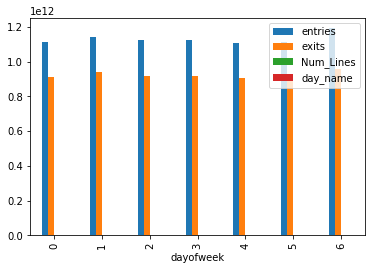

In [25]:
df.date = pd.to_datetime(df.date)
df['dayofweek'] = df.date.dt.dayofweek
grouped = df.groupby('dayofweek').sum()
grouped.plot(kind='bar')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes.

In [ ]:
print("With an order of magnitude of 2e9, there is a negligble difference between subway traffic on the weekend or a weekday")

# Drop a couple of columns

In [ ]:
df = df.drop('c/a', axis = 1)
df = df.drop('unit', axis = 1)